### Student Information
Name: 張晴淳

Student ID: 313700038

GitHub ID: JEMMA-CHANG

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [34]:
# test code for environment setup
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt') # download the NLTK datasets
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
# If you get "ModuleNotFoundError: No module named 'PAMI'"
# run the following in a new Jupyter cell:
# !pip3 install PAMI
import PAMI
import umap

categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

[nltk_data] Downloading package punkt to /Users/chinnngz/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [35]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
import sys
print(sys.executable) # c:\<your path to the project directory>\.venv\Scripts\python.exe
print(sys.version) #3.11.0

/Users/chinnngz/Documents/lab 1/DM2025Labs/DM2025-Lab1-Exercise/.venv/bin/python
3.11.0 (v3.11.0:deaf509e8f, Oct 24 2022, 14:43:23) [Clang 13.0.0 (clang-1300.0.29.30)]


# 0. Data

## new dataset - reddit stock sentiment
內容為reddit上的投資社群貼文跟留言情緒資訊．欄位包含：
- `type`:資料型態，是貼文還是留言．
- `datetime`:發文的時間．
- `post_id` / `subreddit`(在哪個社群) / `title` / `author` / `url`
- `upvotes` / `downvotes` / `upvote_ratio`:推噓及其比例
- `text`
- `subjectivity`（越接近1越主觀）、`polarity`（越接近 1 越正向）、`sentiment`：文字情緒分析結果。
- `entities`：抽取出的關鍵詞。
- `label`：整體情緒標籤。

# 1. data preparation

In [37]:
data_path = "newdataset/Reddit-stock-sentiment.csv"
df = pd.read_csv(data_path)

print(f"資料筆數：{len(df)}")
df[0:5]

資料筆數：847


,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0


In [38]:
cols = df.columns.tolist()
cols

['type',
 'datetime',
 'post_id',
 'subreddit',
 'title',
 'author',
 'url',
 'upvotes',
 'downvotes',
 'upvote_ratio',
 'text',
 'subjectivity',
 'polarity',
 'sentiment',
 'entities',
 'label']

In [39]:
pd.crosstab(df['sentiment'], df['label'])

label,-1.0,0.0,1.0
sentiment,,,
-1.0,115,61,21
0.0,93,212,26
1.0,107,150,62


`'sentiment'`&`'label'`的情緒分類並非完全一致，為了方便後續作業，這裡選取`'label'`作為主要的依據．
對應到master notebook的欄位結構，

In [40]:
label_map = {
    -1.0: "negative",
     0.0: "neutral",
     1.0: "positive"
}

df['label_name'] = df['label'].map(label_map)   

df = df[['text', 'label', 'label_name']]
df[:5]


,text,label,label_name
0,Calls on retards,-1.0,negative
1,Stunt as in like why did they even make a big ...,0.0,neutral
2,Seeing lots of red in the ticker.,0.0,neutral
3,Vision Marine Technologies Inc. is rewriting t...,1.0,positive
4,He didn’t say thank you.,-1.0,negative


In [41]:
# print an example of text
print("\n".join(df['text'][0].split('\n')))

Calls on retards


## >>>Exercise 1:

In [42]:
for i in range(3):
    print(f'example {i+1}')
    print('\n'.join(df['text'][i].split('\n')))

example 1
Calls on retards
example 2
Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.
example 3
Seeing lots of red in the ticker.


## 2. Data Transformation

## 2.1 converting data into Dataframe

因為這個資料集沒有`.data`的功能，所以就不用`helper`，直接用`pd.DataFrame`建立表格

In [56]:
X = pd.DataFrame({
    'text': df['text'].tolist(),
})

In [57]:
print(X[:2])

                                                text
0                                   Calls on retards
1  Stunt as in like why did they even make a big ...


In [58]:
len(X)

847

In [59]:
for t in X['text'][:2]:
    print(t)

Calls on retards
Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.


### adding columns

In [60]:
X['label'] = df['label']

In [61]:
X['label_name'] = df['label_name']

In [ ]:
# print and see what our table looks like
X[:10]

,text,label,label_name
0,Calls on retards,-1.0,negative
1,Stunt as in like why did they even make a big ...,0.0,neutral
2,Seeing lots of red in the ticker.,0.0,neutral
3,Vision Marine Technologies Inc. is rewriting t...,1.0,positive
4,He didn’t say thank you.,-1.0,negative
5,"Hoping to ejaculate in wet warm puss tonight, ...",0.0,neutral
6,Trump will respond to china increasing their t...,-1.0,negative
7,Confirmed not a trap. Its been like this for p...,0.0,neutral
8,Am I the only one seeing the cup & handle brea...,1.0,positive
9,HLGN is $10. Hurry and catch it now before it ...,1.0,positive


## 2.2 familiarizing yourself with the data

In [ ]:
# a simple query
X[:10][['text', 'label_name']]

,text,label_name
0,Calls on retards,negative
1,Stunt as in like why did they even make a big ...,neutral
2,Seeing lots of red in the ticker.,neutral
3,Vision Marine Technologies Inc. is rewriting t...,positive
4,He didn’t say thank you.,negative
5,"Hoping to ejaculate in wet warm puss tonight, ...",neutral
6,Trump will respond to china increasing their t...,negative
7,Confirmed not a trap. Its been like this for p...,neutral
8,Am I the only one seeing the cup & handle brea...,positive
9,HLGN is $10. Hurry and catch it now before it ...,positive


In [ ]:
# query the last 10 records
X[-10:]

,text,label,label_name
837,Finance media lying \n\n*Surprise*,-1.0,negative
838,I am all in,0.0,neutral
839,The Art of the Deal…,0.0,neutral
840,Lol fr,0.0,neutral
841,So countries “begging to stop the tariffs” and...,1.0,positive
842,Invest now it is going to shoot up tomorrow,1.0,positive
843,Where can I read this?,0.0,neutral
844,"Upgrades, Downgrades\n\n [Stock Analyst Recomm...",0.0,neutral
845,i sold my puts so i expect cheeto to declare w...,-1.0,negative
846,![img](emote|t5_2th52|31224),0.0,neutral


In [67]:
# using loc(by label)
X.loc[:10, 'text']

0                                      Calls on retards
1     Stunt as in like why did they even make a big ...
2                     Seeing lots of red in the ticker.
3     Vision Marine Technologies Inc. is rewriting t...
4                              He didn’t say thank you.
5     Hoping to ejaculate in wet warm puss tonight, ...
6     Trump will respond to china increasing their t...
7     Confirmed not a trap. Its been like this for p...
8     Am I the only one seeing the cup & handle brea...
9     HLGN is $10. Hurry and catch it now before it ...
10         It's a copy/paste from a Bloomberg terminal.
Name: text, dtype: object

In [68]:
#using iloc(by position)
X.iloc[:10, 0]

0                                     Calls on retards
1    Stunt as in like why did they even make a big ...
2                    Seeing lots of red in the ticker.
3    Vision Marine Technologies Inc. is rewriting t...
4                             He didn’t say thank you.
5    Hoping to ejaculate in wet warm puss tonight, ...
6    Trump will respond to china increasing their t...
7    Confirmed not a trap. Its been like this for p...
8    Am I the only one seeing the cup & handle brea...
9    HLGN is $10. Hurry and catch it now before it ...
Name: text, dtype: object

## >>>Exercise 2

In [69]:
#取出中性情緒的前三筆資料
X[X['label'] == 0][:3]

,text,label,label_name
1,Stunt as in like why did they even make a big ...,0.0,neutral
2,Seeing lots of red in the ticker.,0.0,neutral
5,"Hoping to ejaculate in wet warm puss tonight, ...",0.0,neutral


In [72]:
# 取出同時為中性情緒且'text'中包含'image'的前三筆資料
X[(X['label'] == 0) & (X['text'].str.contains('no'))][0:3]

,text,label,label_name
7,Confirmed not a trap. Its been like this for p...,0.0,neutral
28,"My first wife was tarded, she's a pilot now.",0.0,neutral
31,$EVGO \n\n*Record Revenue increasing 5 straigh...,0.0,neutral


## >>>Exercise 3

Try to fetch records belonging to the `positive` label, and query every 10th record. Only shoe the first 5 records.

In [73]:
X[X['label_name'] == 'positive'][::10][:5]

,text,label,label_name
3,Vision Marine Technologies Inc. is rewriting t...,1.0,positive
78,I think it’s gonna work itself out. I bought t...,1.0,positive
168,The obvious can also be refreshing from CNBC: ...,1.0,positive
219,Same. Back to break even after that last rip b...,1.0,positive
319,Etrade has a feed of news articles about how r...,1.0,positive


# 3. Data Mining using Pandas

## 3.1 missing value

In [74]:
# check missing values
X.isnull()

,text,label,label_name
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
842,False,False,False
843,False,False,False
844,False,False,False
845,False,False,False


In [75]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,label,label_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


## >>>Exercise 4

In [79]:
# calculate the missing values in every record.
X.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0      (The amoung of missing records is: , 0)
1      (The amoung of missing records is: , 0)
2      (The amoung of missing records is: , 0)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 0)
                        ...                   
842    (The amoung of missing records is: , 0)
843    (The amoung of missing records is: , 0)
844    (The amoung of missing records is: , 0)
845    (The amoung of missing records is: , 0)
846    (The amoung of missing records is: , 0)
Length: 847, dtype: object

In [82]:
dummy_series = pd.Series(["dummy_record", 1], index=["text", "label"])
dummy_series

text     dummy_record
label               1
dtype: object

In [83]:
dummy_series.to_frame().T

,text,label
0,dummy_record,1


In [85]:
result_with_series = pd.concat([X, dummy_series.to_frame().T], ignore_index=True)
len(result_with_series)

848

In [86]:
print(result_with_series[:3])

                                                text label label_name
0                                   Calls on retards  -1.0   negative
1  Stunt as in like why did they even make a big ...   0.0    neutral
2                  Seeing lots of red in the ticker.   0.0    neutral


In [87]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,label,label_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,1


In [88]:
# dummy record as dictionary format
dummy_dict = [{'text': 'dummy_record',
               'label': 1
              }]

In [89]:
X = pd.concat([X, pd.DataFrame(dummy_dict)], ignore_index=True)

In [90]:
len(X)

848

In [91]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,label,label_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,1


In [92]:
X.dropna(inplace=True)

In [93]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,label,label_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


In [94]:
len(X)

847

## >>>Exercise 5

In [95]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [96]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

## 3.2 Dealing with Duplicate Data

In [97]:
X.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
842    False
843    False
844     True
845    False
846    False
Length: 847, dtype: bool

In [98]:
sum(X.duplicated())

23

In [100]:
sum(X.duplicated('text'))

23

我們可以發現資料中有23筆的`text`是有重複值的

In [101]:
# inplace applies changes directly on our dataframe
X.drop_duplicates(keep=False, inplace=True)

In [102]:
len(X)

813

# 4. Data Preprocessing

## 4.1 Sampling

In [104]:
X_sample = X.sample(n=500) 

In [105]:
len(X_sample)

500

In [106]:
X_sample[0:4]

,text,label,label_name
417,My concern is that it will give him the excuse...,-1.0,negative
504,US currently has no allies.,0.0,neutral
343,r/CanadianInvestor would a better place to ask...,1.0,positive
11,"this sub has ruined emails for me, whenever I ...",0.0,neutral


In [107]:
X[0:4]

,text,label,label_name
0,Calls on retards,-1.0,negative
1,Stunt as in like why did they even make a big ...,0.0,neutral
2,Seeing lots of red in the ticker.,0.0,neutral
3,Vision Marine Technologies Inc. is rewriting t...,1.0,positive


## >>>Exercise 6

In [108]:
# Answer here
print("原始X的大小：", X.shape)
print("抽樣後X_sample的大小：", X_sample.shape)
print("原始X的前十個索引：", X.index[:10].tolist())
print("抽樣後X原始X的前十個索引：", X_sample.index[:10].tolist())
print("X和X_sample的欄位是否相同？", X.columns.equals(X_sample.columns))
'''
1. 原始的資料大小跟抽樣後的資料大小不同，抽樣後資料會變少
2. 原始的索引是連續的，抽樣後會跳號'''

原始X的大小： (813, 3)
抽樣後X_sample的大小： (500, 3)
原始X的前十個索引： [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
抽樣後X原始X的前十個索引： [417, 504, 343, 11, 14, 212, 181, 390, 185, 285]
X和X_sample的欄位是否相同？ True


'\n1. 原始的資料大小跟抽樣後的資料大小不同，抽樣後資料會變少\n2. 原始的索引是連續的，抽樣後會跳號'

In [109]:
import matplotlib.pyplot as plt
%matplotlib inline

label_name
neutral     391
negative    315
positive    107
Name: count, dtype: int64


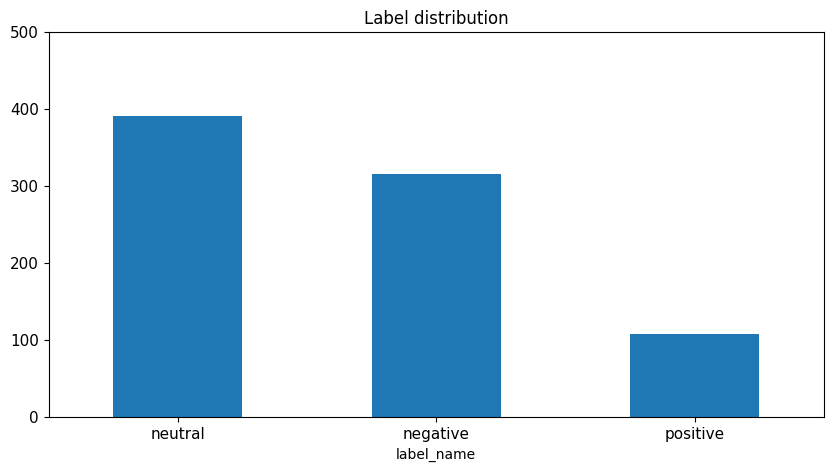

In [118]:
print(X['label_name'].value_counts())

# plot barchart for X
X['label_name'].value_counts().plot(kind = 'bar',
                                    title = 'Label distribution',
                                    ylim = [0, 500],        
                                    rot = 0, fontsize = 11, figsize = (10,5));

label_name
neutral     236
negative    200
positive     64
Name: count, dtype: int64


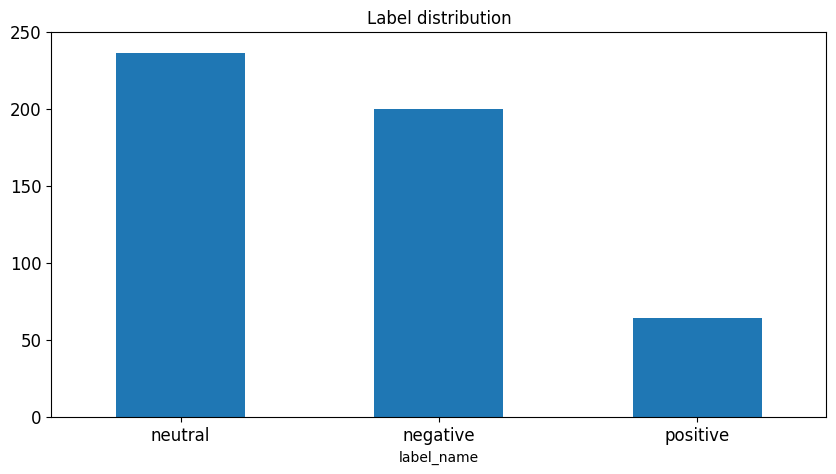

In [119]:
print(X_sample['label_name'].value_counts())

# plot barchart for X_sample
X_sample['label_name'].value_counts().plot(kind = 'bar',
                                           title = 'Label distribution',
                                           ylim = [0, 250], 
                                           rot = 0, fontsize = 12, figsize = (10,5));

## >>>Exercise 7

<Axes: title={'center': 'Label distribution'}, xlabel='label_name'>

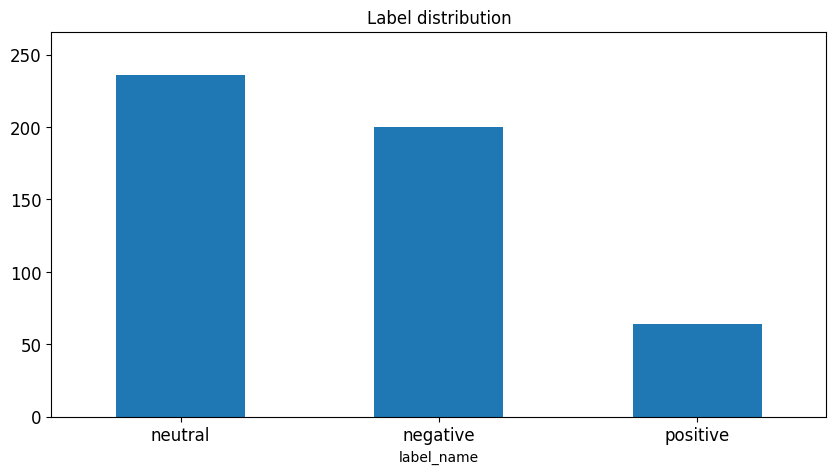

In [120]:
# automatically set the `ylim` parameters
X_sample['label_name'].value_counts().plot(kind = 'bar',
                                           title = 'Label distribution',
                                           ylim = [0, X_sample['label_name'].value_counts().max()+30],
                                           rot = 0, fontsize = 12, figsize = (10,5))

## >>>Exercise 8

do the side-by side comparison of the distribution between the two datasets

<Axes: title={'center': 'Label distribution'}, xlabel='label_name'>

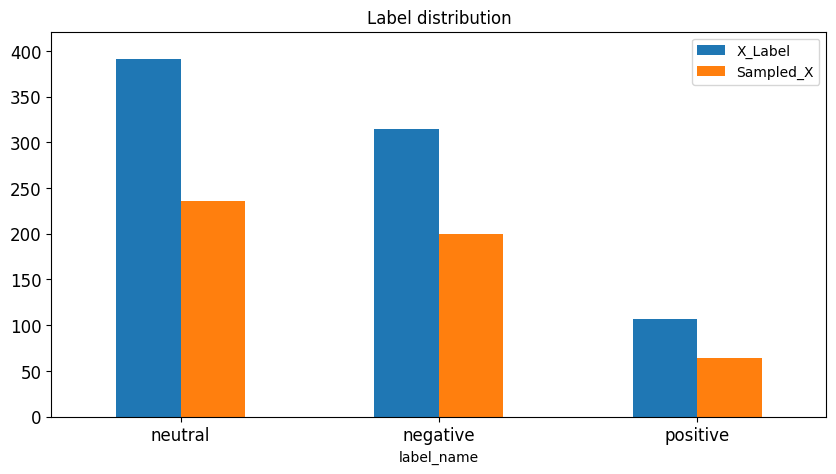

In [123]:
counts_X = X['label_name'].value_counts()
counts_sample = X_sample['label_name'].value_counts()
compare_df = pd.concat([counts_X, counts_sample], axis = 1, keys=["X_Label", "Sampled_X"])
compare_df.plot(kind = 'bar',
                title = 'Label distribution',
                ylim = [0, X['label_name'].value_counts().max()+30],
                rot = 0, fontsize = 12, figsize = (10,5))

## 4.2 Feature creation

In [124]:
import nltk
nltk.download("punkt")
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to /Users/chinnngz/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/chinnngz/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [125]:
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

In [126]:
X[0:4]["unigrams"]

0                                 [Calls, on, retards]
1    [Stunt, as, in, like, why, did, they, even, ma...
2          [Seeing, lots, of, red, in, the, ticker, .]
3    [Vision, Marine, Technologies, Inc., is, rewri...
Name: unigrams, dtype: object

In [127]:
X[0:4]

,text,label,label_name,unigrams
0,Calls on retards,-1.0,negative,"[Calls, on, retards]"
1,Stunt as in like why did they even make a big ...,0.0,neutral,"[Stunt, as, in, like, why, did, they, even, ma..."
2,Seeing lots of red in the ticker.,0.0,neutral,"[Seeing, lots, of, red, in, the, ticker, .]"
3,Vision Marine Technologies Inc. is rewriting t...,1.0,positive,"[Vision, Marine, Technologies, Inc., is, rewri..."


In [ ]:
list(X[0:1]['unigrams'])

[['Calls', 'on', 'retards']]

## 4.3 Feature subset selection

In [132]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
print(X_counts[0])

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 3 stored elements and shape (1, 4313)>
  Coords	Values
  (0, 689)	1
  (0, 2682)	1
  (0, 3220)	1


In [134]:
count_vect.get_feature_names_out()[689]

'calls'

In [135]:
count_vect.get_feature_names_out()[2682]

'on'

In [136]:
count_vect.get_feature_names_out()[3220]

'retards'

依照剛剛設定的`CountVectorizer`產生一個斷詞產生器，呼叫後可以回傳該句的`token list`

In [137]:
analyze = count_vect.build_analyzer()
analyze("I am craving for a hawaiian pizza right now")

['am', 'craving', 'for', 'hawaiian', 'pizza', 'right', 'now']

## >>>Exercise 9

In [138]:
# How do we turn our array[0] text document into a tokenized text using the build_analyzer()?
analyze(X.text[0])

['calls', 'on', 'retards']

In [139]:
X_counts.shape

(813, 4313)

In [140]:
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '01378', '02', '027', '03', '06', '08', '10', '100'],
      dtype=object)

In [153]:
X_counts[0:3, 0:200].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 

In [185]:
np.argwhere(X_counts[1, 0:200].toarray() > 0)



array([[  0, 175]])

In [147]:
count_vect.get_feature_names_out()[0:1]

array(['00'], dtype=object)

## >>>Exercise 10

找出第二篇文章中前兩個在稀疏矩陣中非`0`的詞．
因為在稀疏矩陣內部的儲存順序不一定是按照索引的大小排序，
所以我們需要先對第二篇文章中所有非零值的索引進行排序，
再取出前兩個才會是第二篇文章中前兩個非零值的索引．


In [188]:
doc_vector = X_counts[1]
nonzero_idx = np.sort(doc_vector.nonzero()[1])
words = count_vect.get_feature_names_out()
for i, t in enumerate(nonzero_idx[0:2]):
    print(f'第{i+1}個非0的詞是： {words[t]}({t})')

第1個非0的詞是： about(175)
第2個非0的詞是： as(386)


In [ ]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
plot_x

['term_00',
 'term_000',
 'term_01378',
 'term_02',
 'term_027',
 'term_03',
 'term_06',
 'term_08',
 'term_10',
 'term_100',
 'term_1000',
 'term_10000',
 'term_100k',
 'term_100x',
 'term_10k',
 'term_10ks',
 'term_10yr',
 'term_11',
 'term_116',
 'term_118']

In [165]:
# obtain document index
plot_y = ["doc_"+ str(i+1) for i in list(X.index)[0:20]]
plot_y

['doc_1',
 'doc_2',
 'doc_3',
 'doc_4',
 'doc_5',
 'doc_6',
 'doc_7',
 'doc_8',
 'doc_9',
 'doc_10',
 'doc_11',
 'doc_12',
 'doc_13',
 'doc_14',
 'doc_15',
 'doc_16',
 'doc_17',
 'doc_18',
 'doc_19',
 'doc_20']

In [166]:
plot_z = X_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

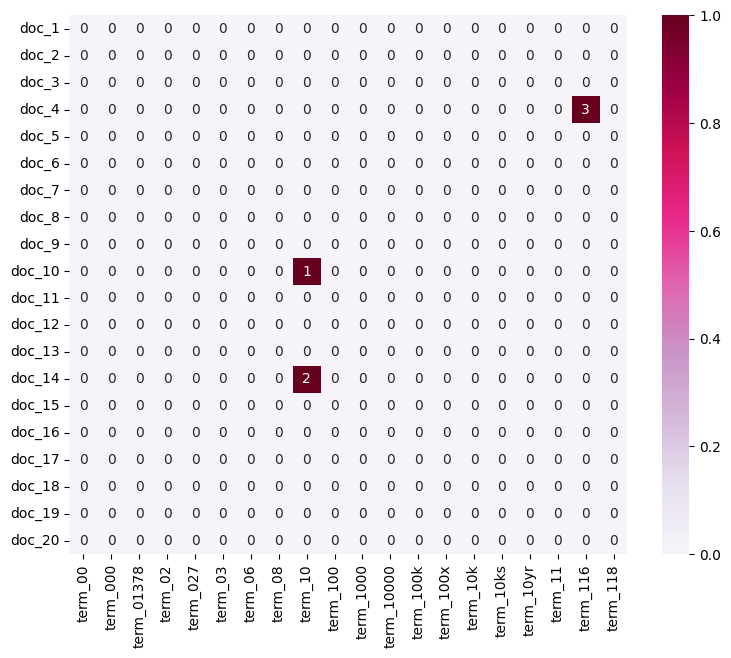

In [167]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

## >>>Exercise 11

1. 只畫高頻詞的`heatmap`
2. 做`TF-IDF`把原本`1`的值壓縮

<Axes: >

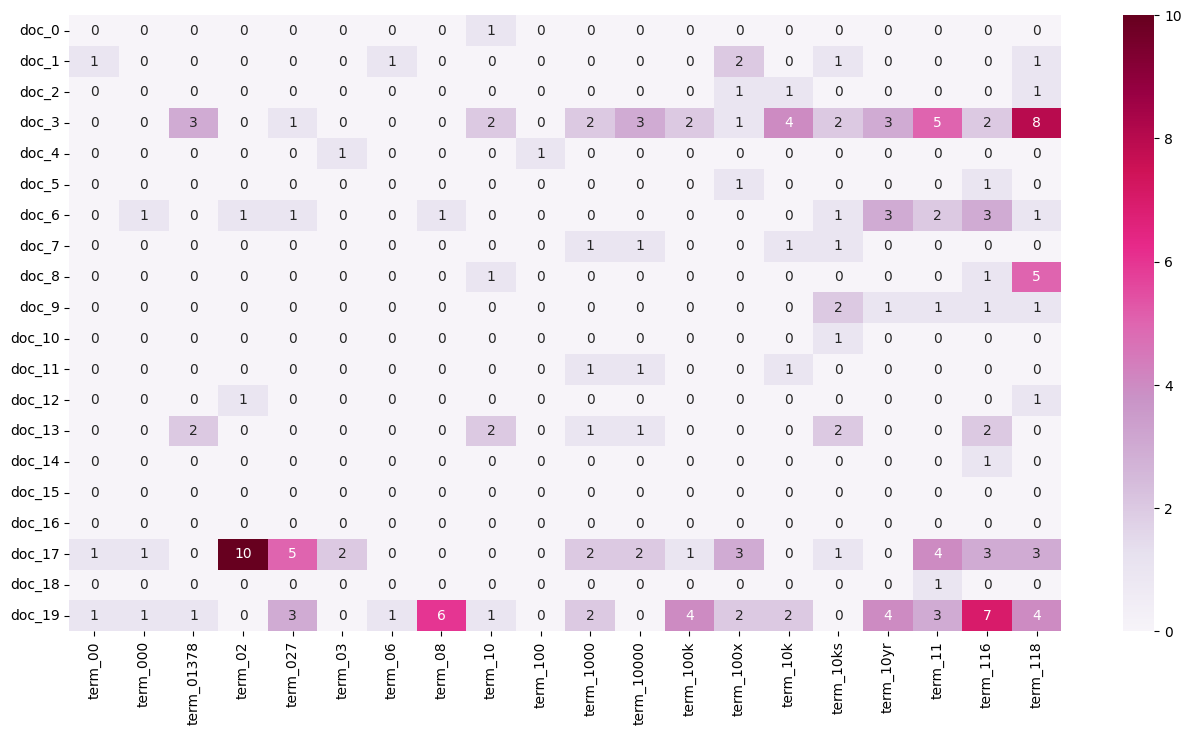

In [169]:
# 只畫高頻詞
term_freq = np.array(X_counts.sum(axis = 0)).flatten()
top_n = 20
top_idx = term_freq.argsort()[-top_n:]
subset = X_counts[0:20, top_idx].toarray()
df_top_terms = pd.DataFrame(subset,
                            columns = [f"term_{i}" for i in count_vect.get_feature_names_out()[0:20]],
                            index = ["doc_"+ str(i) for i in list(X.index)[0:20]])
plt.figure(figsize=(16, 8))
sns.heatmap(df_top_terms, cmap="PuRd", annot=True)


<Axes: >

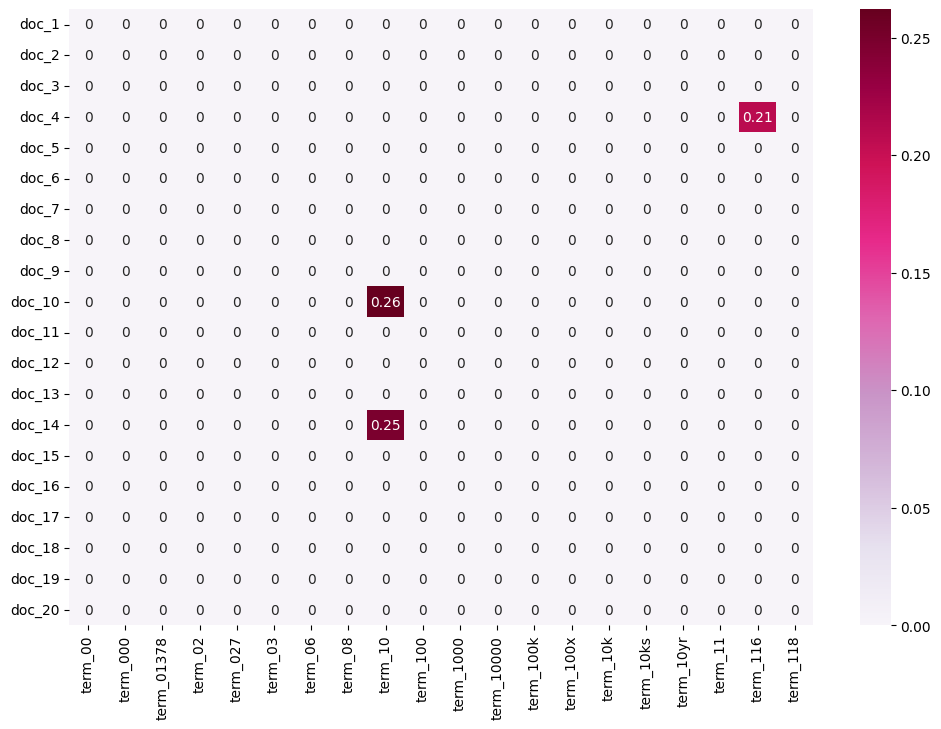

In [171]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer()
X_tfidf = tfidf_vect.fit_transform(X.text)  
plot_z = X_tfidf[0:20, 0:20].toarray()
plot_x = [f"term_{i}" for i in tfidf_vect.get_feature_names_out()[0:20]]
plot_y = [f"doc_{i+1}" for i in list(X.index)[0:20]]

df_todraw = pd.DataFrame(plot_z, columns=plot_x, index=plot_y)
plt.subplots(figsize=(12, 8))
sns.heatmap(df_todraw, cmap="PuRd", annot=True)

## 4.4 Attribute transformation/aggregation

In [200]:
# transform text data
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

term_frequencies[0]


np.int64(4)

/var/folders/kj/zymg76s547s1sqs87rzd5t400000gn/T/ipykernel_42836/3480579971.py:4: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



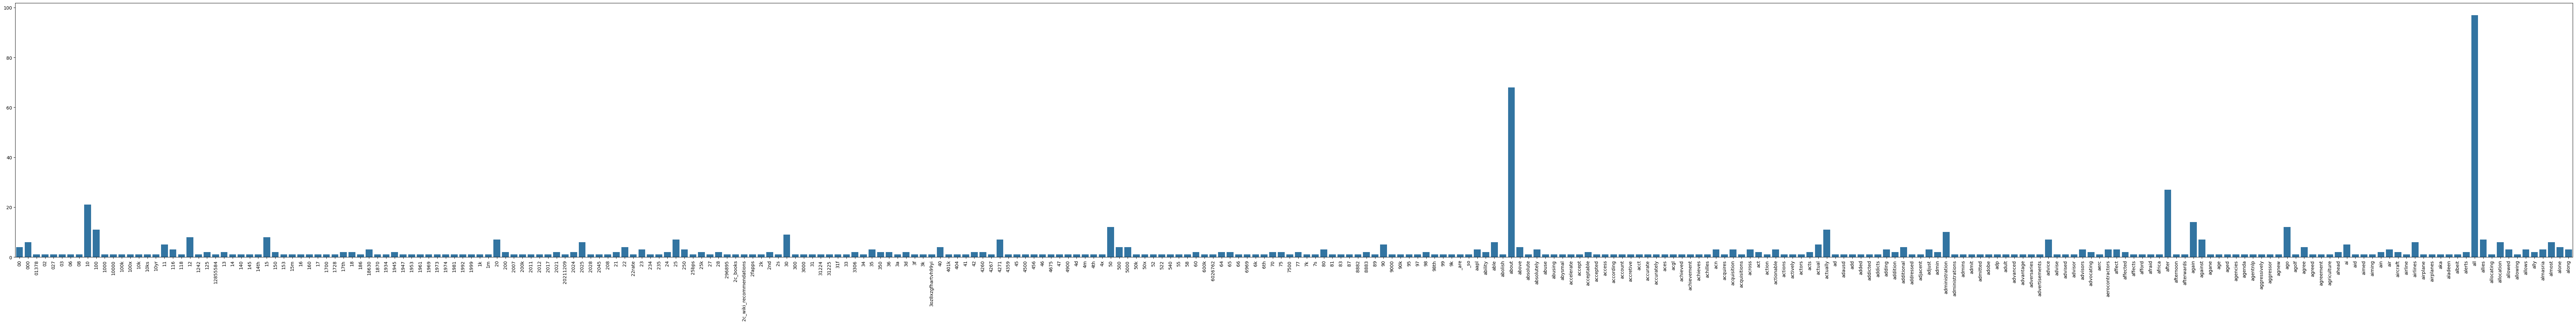

In [201]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

## >>>Exercise 12

In [175]:
# interactive visualization
import plotly.express as px
fig = px.bar(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
fig.show()

## >>>Exercise 13

畫前50個高頻詞的長條圖

/var/folders/kj/zymg76s547s1sqs87rzd5t400000gn/T/ipykernel_42836/2825206399.py:5: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



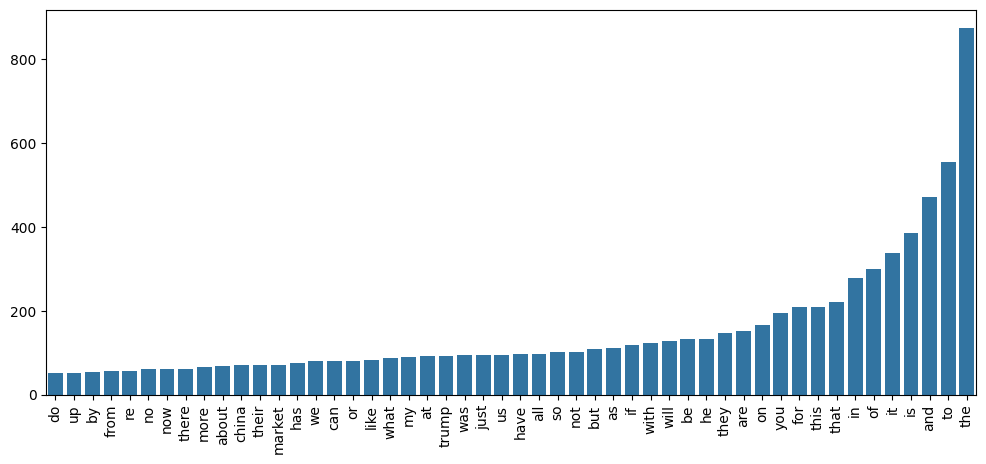

In [202]:
plt.subplots(figsize=(12, 5))
top_N = 50
top_order = np.argsort(term_frequencies)[-top_N:]
g = sns.barplot(x=count_vect.get_feature_names_out()[top_order], y=term_frequencies[top_order])
g.set_xticklabels(count_vect.get_feature_names_out()[top_order], rotation = 90);

## >>>Exercise 14

轉成左尾分布型態

/var/folders/kj/zymg76s547s1sqs87rzd5t400000gn/T/ipykernel_42836/824715448.py:5: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



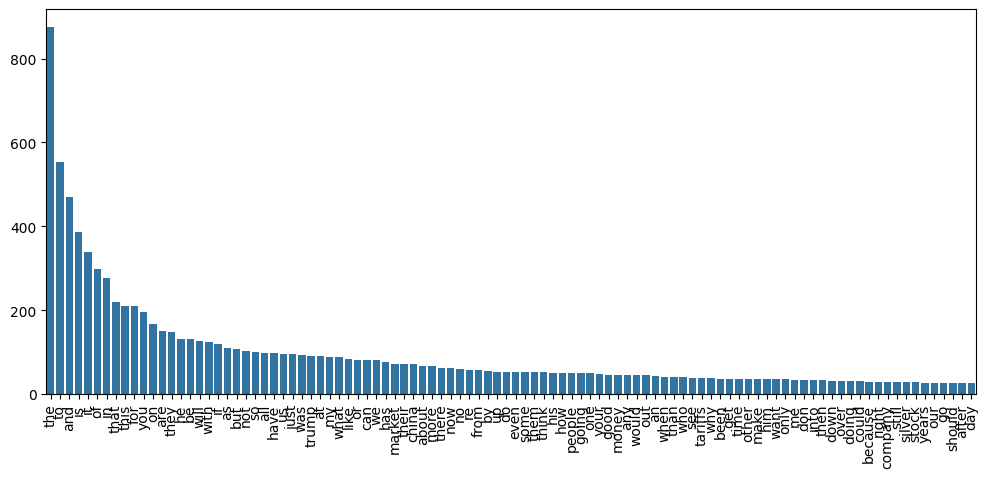

In [205]:
plt.subplots(figsize=(12, 5))
top_N = 100
top_order = np.argsort(term_frequencies)[-top_N:][::-1]
g = sns.barplot(x=count_vect.get_feature_names_out()[top_order], y=term_frequencies[top_order])
g.set_xticklabels(count_vect.get_feature_names_out()[top_order], rotation = 90);

In [206]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

/var/folders/kj/zymg76s547s1sqs87rzd5t400000gn/T/ipykernel_42836/2166548998.py:4: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



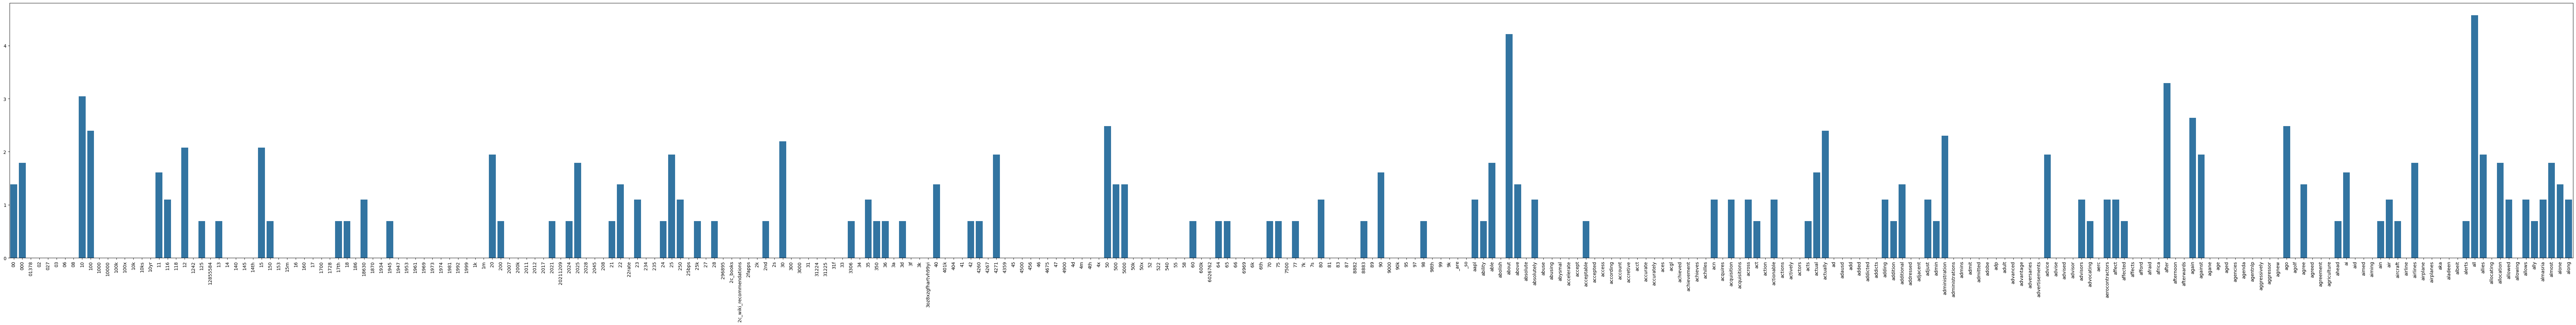

In [207]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

## >>>Exercise 15

/var/folders/kj/zymg76s547s1sqs87rzd5t400000gn/T/ipykernel_42836/4248987528.py:5: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



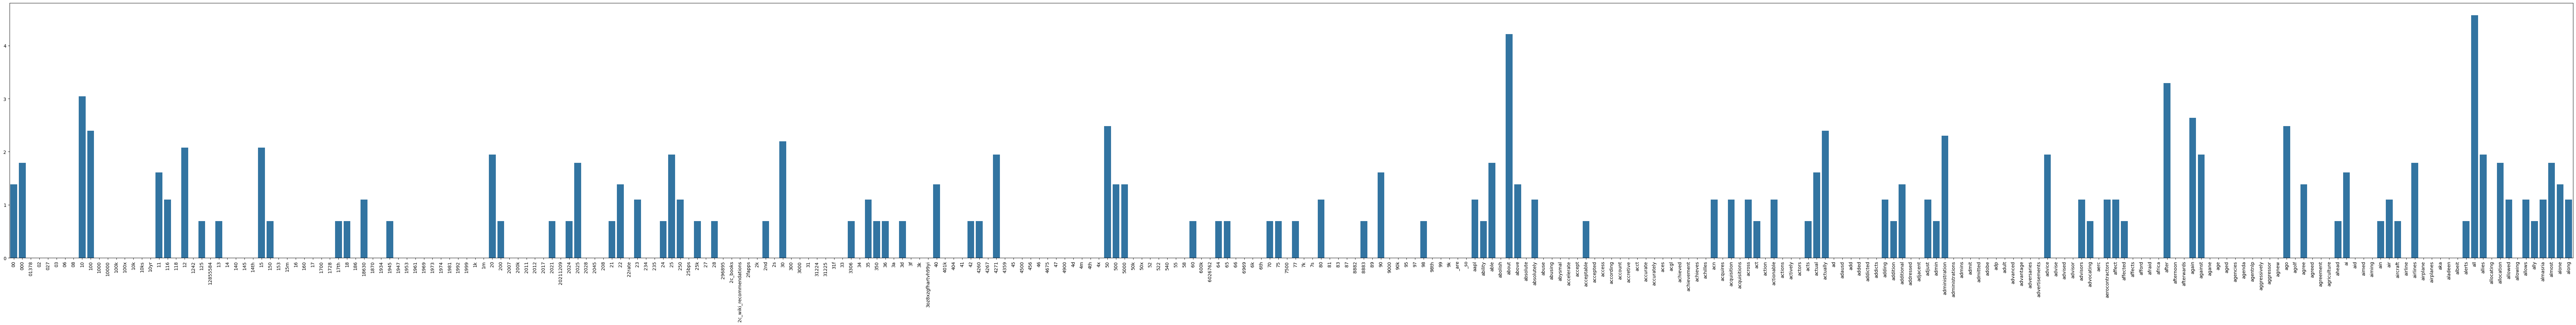

In [209]:
# Answer here
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

# Phase 2

In [ ]:
### Begin Assignment Here